In [9]:
def _compute_apk(targets, predictions, k):

    if len(predictions) > k:
        predictions = predictions[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predictions):
        if p in targets and p not in predictions[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    if not list(targets):
        return 0.0
    return score / min(len(targets), k)

In [11]:
target =[ [1, 0,6,13, 2,4,7,8,9,12], [1, 0,6,13, 2,4,7,8,9,12], [1, 0,6,13, 2,4,7,8,9,12]]
prediction = [[0,7,6],[0,17,14],[12,1,4]]
_compute_apk(target, prediction, 3)

0.0

In [12]:
import ml_metrics as metrics

In [26]:
relevant = actual = [1,4]

retrieved = predicted = [1,2,3,4,5]

print('Answer=',actual,'predicted=',predicted)
print('AP@5 =',metrics.apk(actual,predicted,15) )

Answer= [1, 4] predicted= [1, 2, 3, 4, 5]
AP@5 = 0.75


In [32]:
_compute_apk(actual,predicted,5)

0.75

In [31]:
#verification
(1+(2/4))/2

0.75

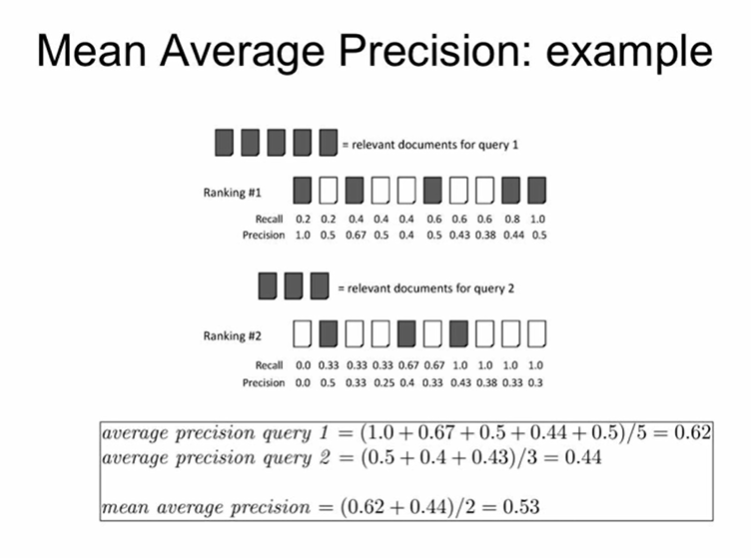

In [20]:
from IPython.display import Image
Image(filename='Z:/TryBooks/map.png')

In [33]:
import numpy as np

def _compute_precision_recall(targets, predictions, k):
   
    pred = predictions[:k]
    num_hit = len(set(pred).intersection(set(targets)))
    precision = float(num_hit) / len(pred)
    recall = float(num_hit) / len(targets)
    return precision, recall



def _compute_apk(targets, predictions, k):

    if len(predictions) > k:
        predictions = predictions[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predictions):
        if p in targets and p not in predictions[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    if not list(targets):
        return 0.0
    return score / min(len(targets), k)



def  evaluate_ranking(target, prediction):
    
    ks=[1,2,3]
    precisions = [list() for _ in range(len(ks))]
    recalls = [list() for _ in range(len(ks))]
    apks = list()
    
    for x, predictions in enumerate(prediction):
        targets =target[x]
        
        for i, _k in enumerate(ks):
            precision, recall = _compute_precision_recall(targets, predictions, _k)
            precisions[i].append(precision)
            recalls[i].append(recall)

    apks.append(_compute_apk(targets, predictions, k=np.inf))

    precisions = [np.array(i) for i in precisions]
    recalls = [np.array(i) for i in recalls]
    mean_aps = np.mean(apks)
    return precisions, recalls, mean_aps

In [38]:
relevant = actual = [[1,4]]
retrieved = predicted =[ [1,2,3,4,5]]


evaluate_ranking(actual,predicted)

([array([1.]), array([0.5]), array([0.33333333])],
 [array([0.5]), array([0.5]), array([0.5])],
 0.75)

In [39]:
target =[ [1, 0,6,13, 2,4,7,8,9,12], [1, 0,6,13, 2,4,7,8,9,12], [1, 0,6,13, 2,4,7,8,9,12]]
prediction = [[0,7,6],[0,17,14],[12,1,4]]

precision, recall, mean_aps = evaluate_ranking(target, prediction)


print(np.mean(precision[0]), np.mean(precision[1]), np.mean(precision[2]))
print(np.mean(recall[0]), np.mean(recall[1]), np.mean(recall[2]))
print(mean_aps)

1.0 0.8333333333333334 0.7777777777777777
0.10000000000000002 0.16666666666666666 0.2333333333333333
0.3
